In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import scipy.integrate as integ
from scipy.optimize import curve_fit
import simulation_utility as su
import time
import json
import os
import math

Number of waveforms 37265, time to read 29.60


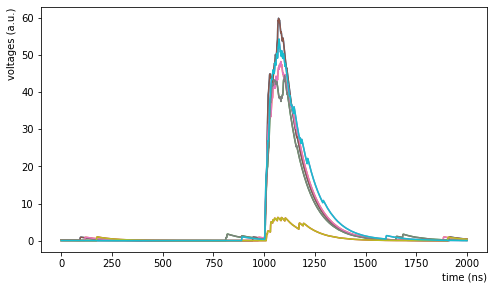

In [2]:
# reading waveforms from all .txt files in the indicated path, also with plot
wfs1 = su.read_waveforms_from_json(path='/home/pieramico/AIUTO/provo/SiPM',
                                   plot = 1)

In [4]:
# run without doing fits, really fast
# "area" variable is also ok for simulation data
df0 = su.calculate_integrals( wfs1, nn = 0, inf = 950, sup=1100)

Total events: 37265
event n. 5000, time to process: 0.81
event n. 10000, time to process: 1.58
event n. 15000, time to process: 2.35
event n. 20000, time to process: 3.11
event n. 25000, time to process: 3.88
event n. 30000, time to process: 4.65
event n. 35000, time to process: 5.42


Total events: 10
peak position not found in trigger region []
peak position not found in trigger region []
peak position not found in trigger region []
peak position not found in trigger region []


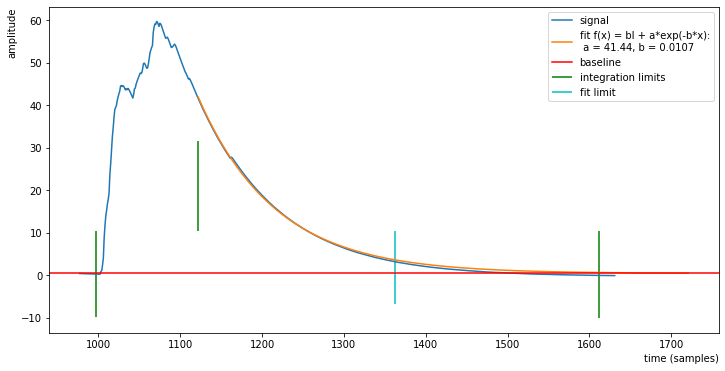

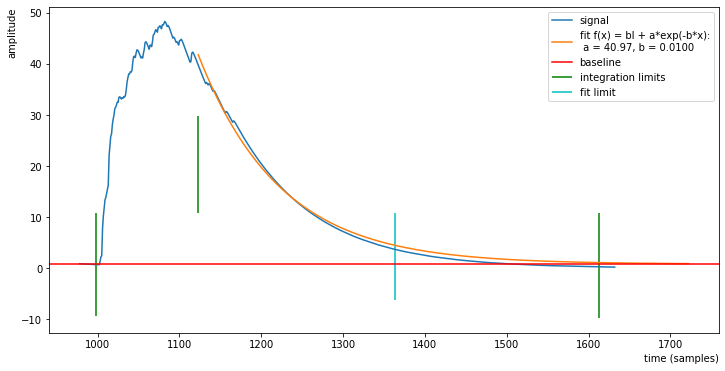

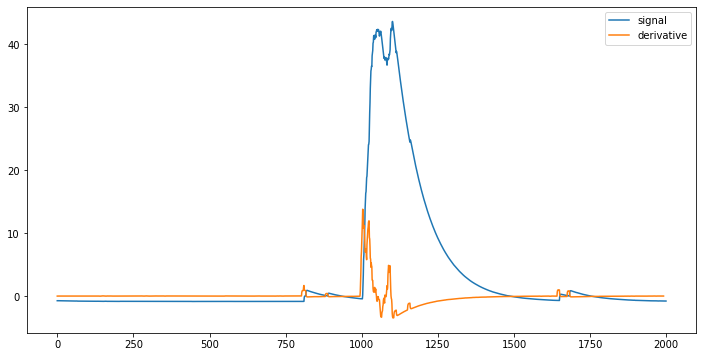

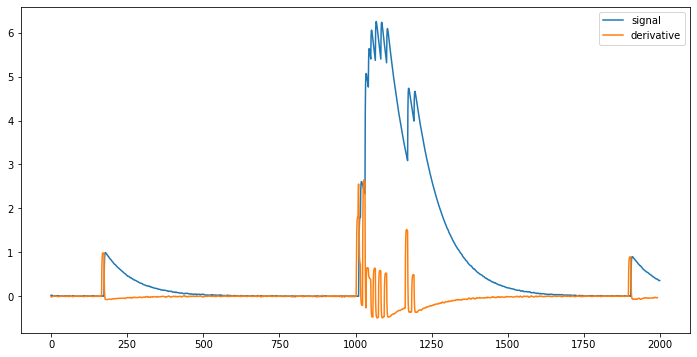

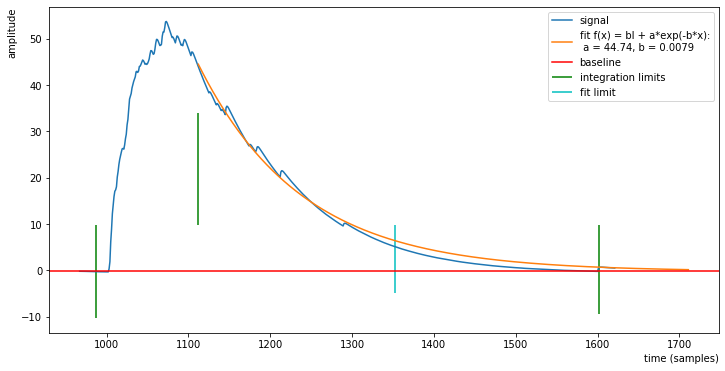

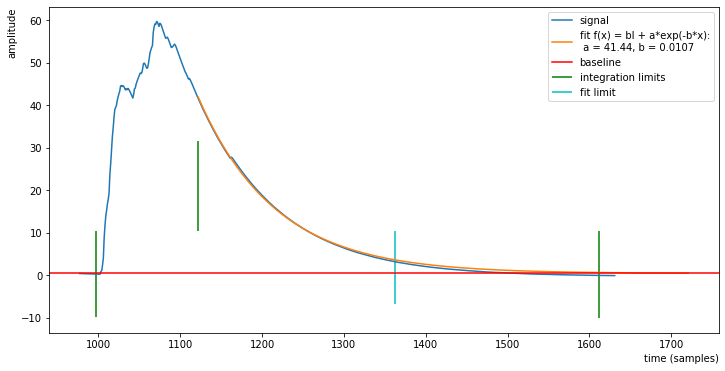

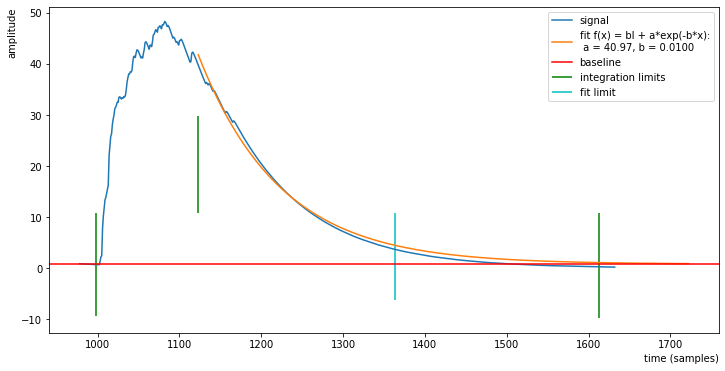

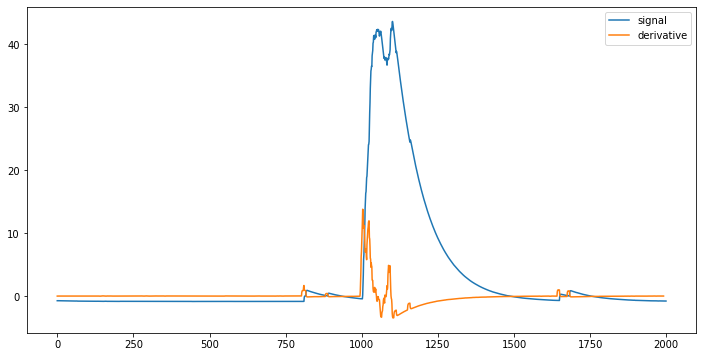

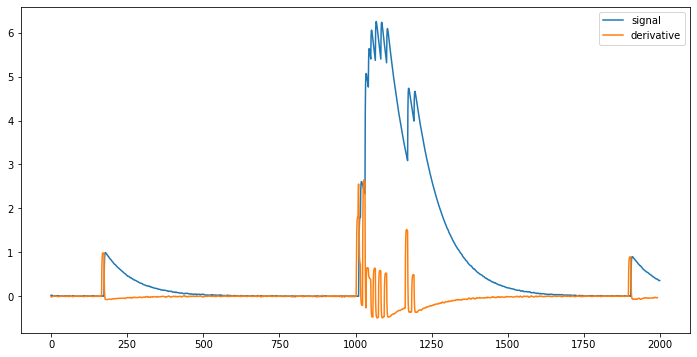

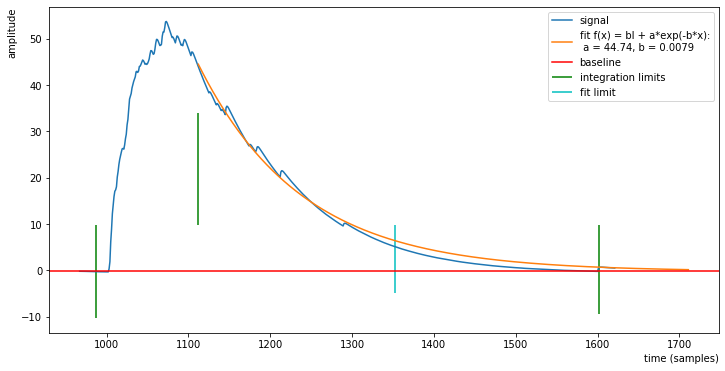

In [5]:
# run for 10 events with fits and showing plots
df1 = su.calculate_integrals( wfs1, nn = 10, inf = 950, sup=1100,
                             plot = 1, calc_int = 1)

In [6]:
# run for all events with fits, a little bit slower
df = su.calculate_integrals( wfs1, nn = 0, inf = 950, sup=1100,
                            plot = 0, calc_int = 1)

Total events: 37265
event n. 5000, time to process: 13.68
event n. 10000, time to process: 27.47
event n. 15000, time to process: 40.74
event n. 20000, time to process: 54.43
event n. 25000, time to process: 67.93
event n. 30000, time to process: 81.58
event n. 35000, time to process: 95.24


In [22]:
def plot_area(area, area2 = None, xrange=(1000,25000), bins=200, log=False ):
    print(f'n. events: 1PE={len(area)}')
    h, x = np.histogram(area,bins=bins,range=xrange)
    if area2 is not None:
        h2, x2 = np.histogram(area2,bins=bins,range=xrange)
    plt.figure(figsize=(8,4.5))
    plt.plot(x[1:],h,label='area')
    if area2 is not None:
        plt.plot(x2[1:],h2,label='integrals')
    if log: plt.yscale('log')
    plt.legend()

n. events: 1PE=37265


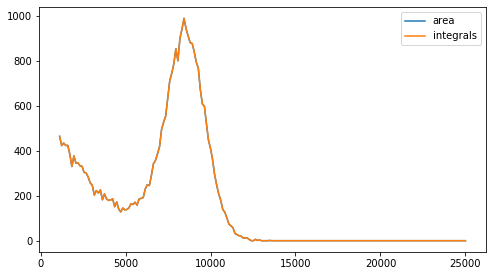

In [24]:
plot_area(df['area'],df['integral'],log=0)

n. events: 1PE=37265


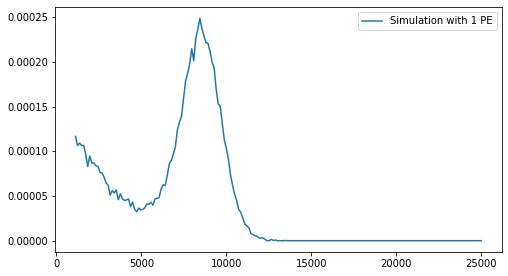

In [19]:
plot_area(df['area'],log=0)